In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import os
import pandas as pd
import arrow
import xarray as xr 

In [2]:
basedir = '/results2/SalishSea/nowcast-green.202111/'

iZ = 10
#For BP files
iY = 344
iX = 276

#2016
start = dt.datetime(2016,1,1)
end = dt.datetime(2016,12,31)
#16-22
start = dt.datetime(2017,1,1)
end = dt.datetime(2022,12,31)

timerange = arrow.Arrow.range('day',start,end)

for i,day in enumerate(timerange):
    dir1 = day.format('DDMMMYY').lower()
    ymd = day.format('YYYYMMDD')
    filename = 'SalishSea_1h_'+ ymd +'_' + ymd + '_grid_U.nc'
    fullfile = os.path.join(basedir,dir1,filename)
    u_vel = xr.open_dataset(fullfile)
    velocity = u_vel['vozocrtx'].isel(y=iY, x=iX).sel(depthu=iZ, method='nearest')
    u_vel.close()

    if i == 0:
        velocity_year = velocity.copy(deep=True)
        velocity.close()
    else:
        velocity_year = xr.concat([velocity_year, velocity], dim='time_counter')
        velocity.close()
    if i % 10 == 0:
        print (i)


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360


In [3]:
velocity_year.to_netcdf('velocity_2016_BP.nc')

### Low pass filter

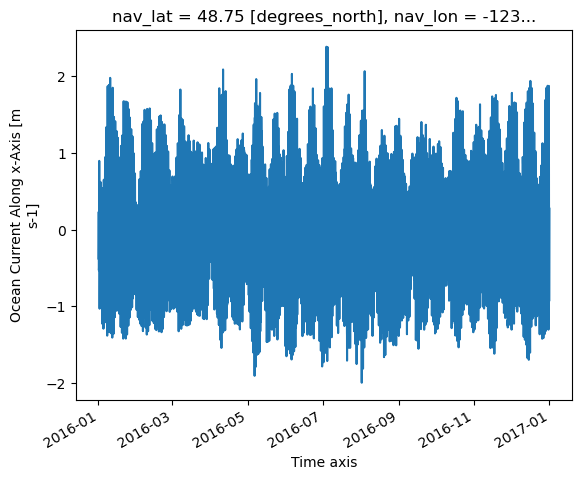

In [4]:
velocity_year.plot()

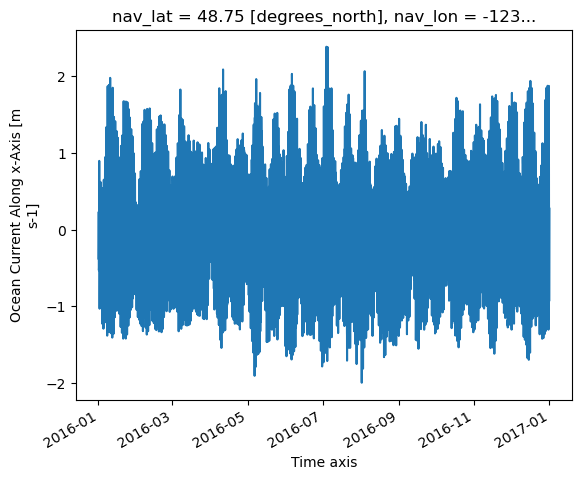

In [5]:
velocity = xr.open_dataset('velocity_2016_BP.nc')
velocity.vozocrtx.plot()

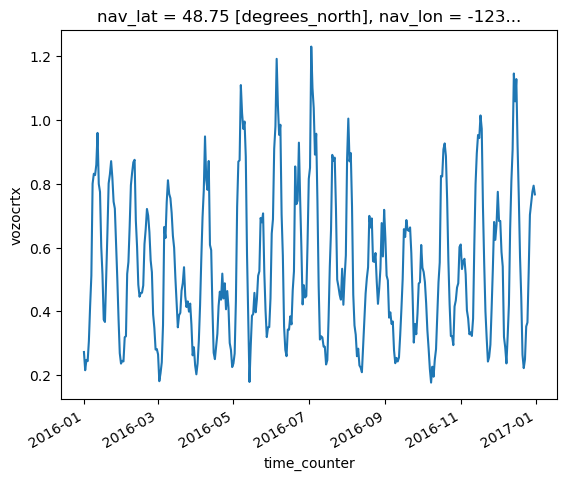

In [6]:
vel_squared = velocity*velocity

day_avg_tide_vel = vel_squared.resample(time_counter='1D').mean()
day_avg_tide_vel.vozocrtx.plot()

<AxesSubplot: xlabel='time_counter'>

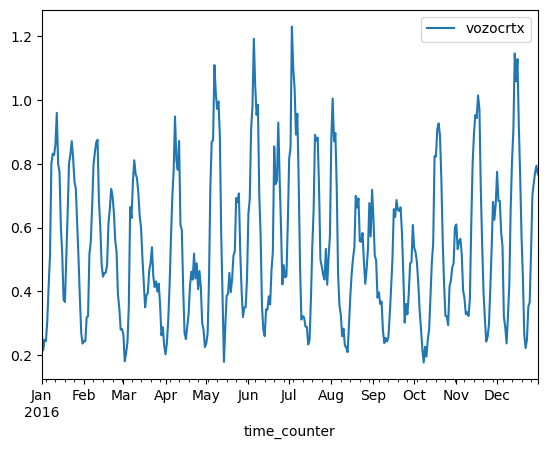

In [7]:
day_avg_tide_pd = day_avg_tide_vel.to_dataframe()
day_avg_tide_pd = day_avg_tide_pd.drop('depthu', axis=1)
day_avg_tide_pd = day_avg_tide_pd.drop('nav_lat', axis=1)
day_avg_tide_pd = day_avg_tide_pd.drop('nav_lon', axis=1)
day_avg_tide_pd.to_csv('day_avg_tide_BP_2016.csv')
day_avg_tide_pd.plot()

<AxesSubplot: xlabel='time_counter'>

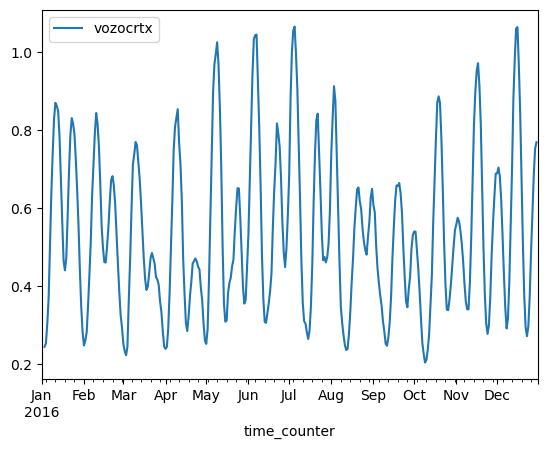

In [8]:
low_pass_tide = day_avg_tide_pd.rolling(4, center=True).mean()
low_pass_tide.to_csv('low_pass_tide_2016_BP.csv')
low_pass_tide.plot()